### **General Descriptive Analysis**:

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
df = pd.read_csv("bank-direct-marketing-campaigns.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y(dependent _variable)
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [49]:
df.shape

(41188, 20)

In [50]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y(dependent _variable)'],
      dtype='object')

In [51]:
df = df.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx', 'nr.employed': 'nr_employed', 'y(dependent _variable)': 'y'})

In [52]:
#the number of unique values ​​in each column.
df.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp_var_rate       10
cons_price_idx     26
cons_conf_idx      26
euribor3m         316
nr_employed        11
y                   2
dtype: int64

Yes:  4640
No:  36548


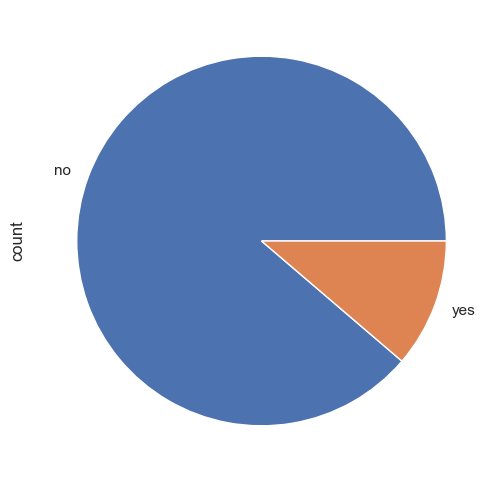

In [53]:
df["y"].value_counts().plot(kind='pie') # the number of non-depositors is very high.
print('Yes: ', df['y'][df['y'] == 'yes'].count())
print('No: ',df['y'][df['y'] == 'no'].count())

In [54]:
df.describe() #For our numeric values, we look at mean, std, min, max values.

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [55]:
df["month"].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [56]:
# ordering again, because the months are not listed correctly.
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

/var/folders/w3/k6zlf0mx00108xfnnw6mzb3h0000gn/T/ipykernel_39626/1164904706.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["month", "y"]).size().sort_index().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='month'>

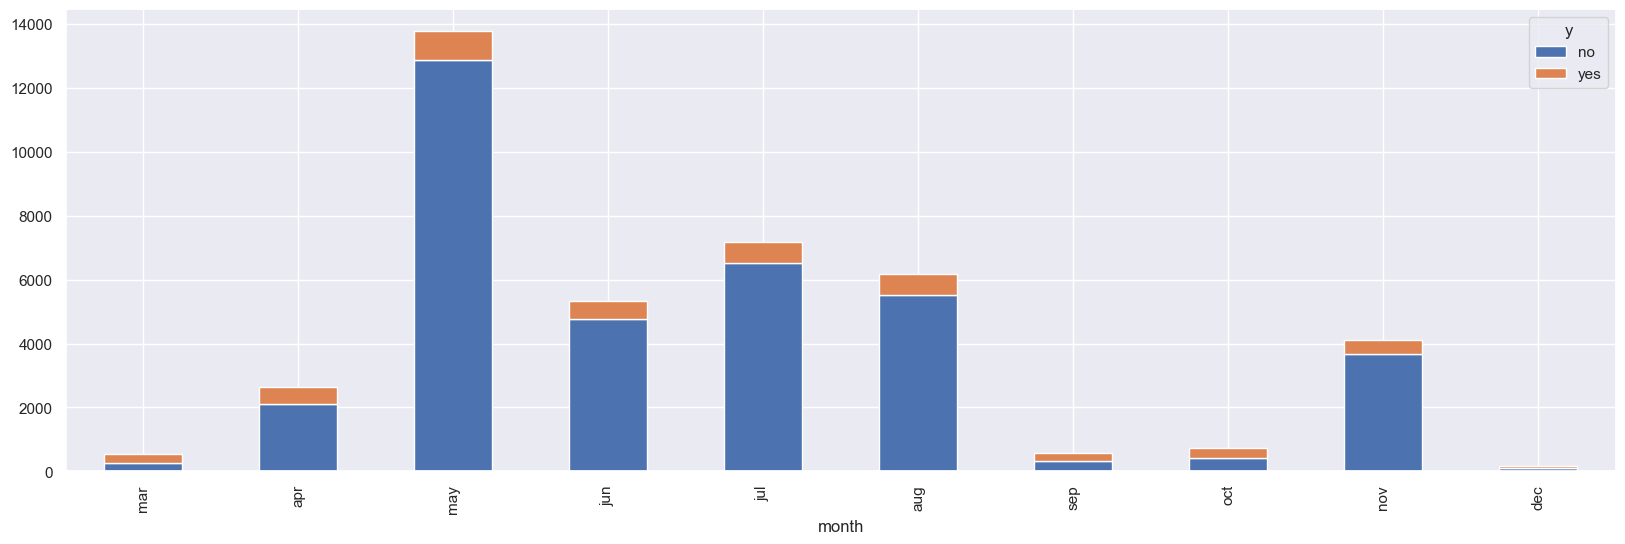

In [57]:
# There is a partial increase in the number of depositors during the summer months.
df.groupby(["month", "y"]).size().sort_index().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='job'>

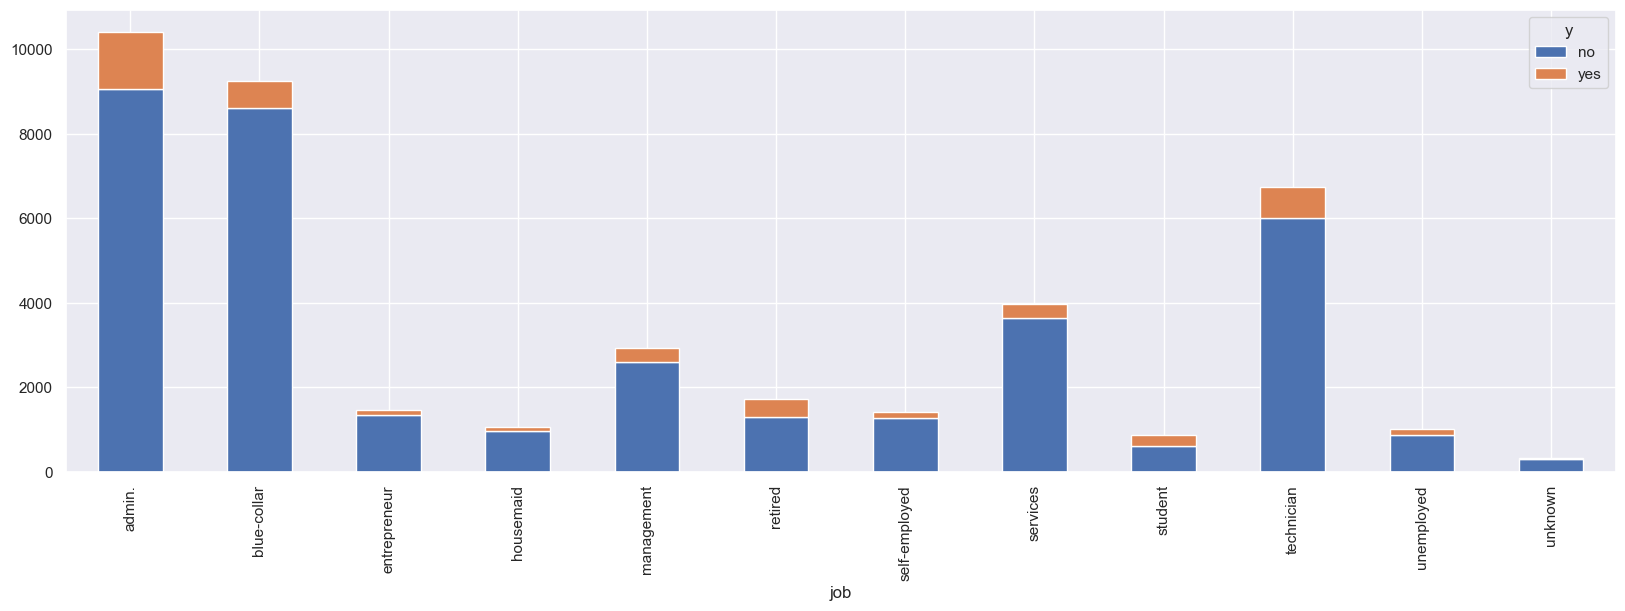

In [58]:
# Those with higher salaries are more likely to deposit.
df.groupby(["job", "y"]).size().unstack().plot(kind='bar', stacked=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

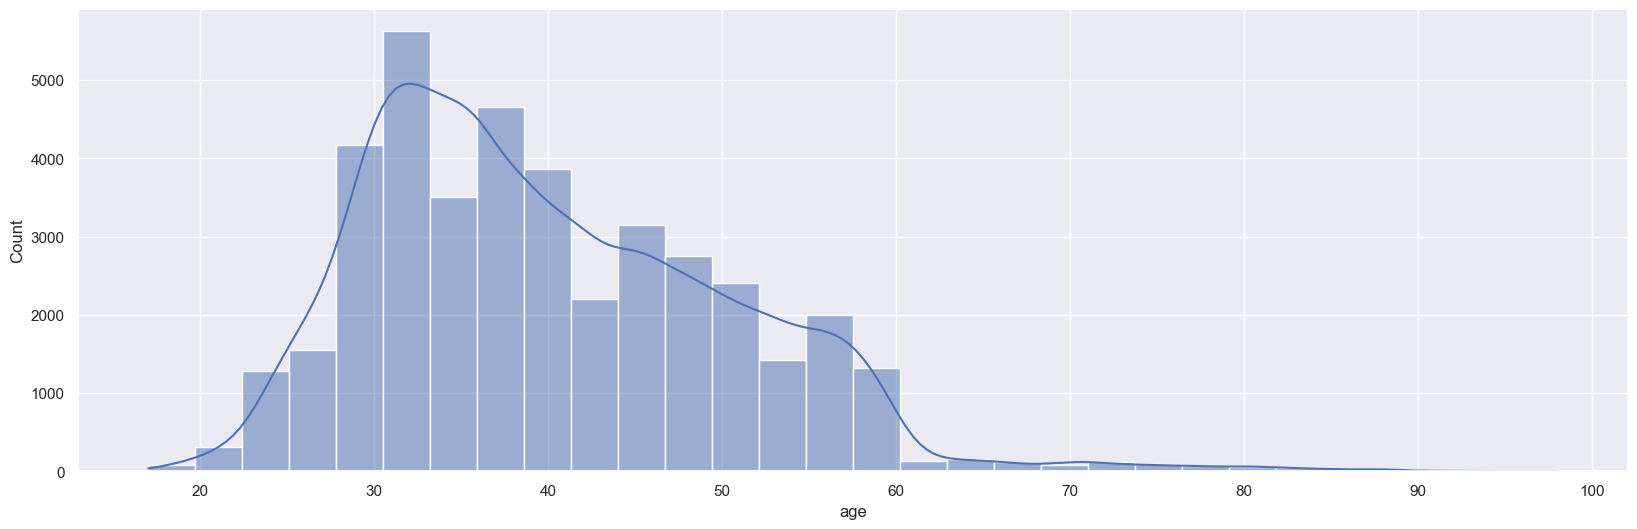

In [59]:
# Middle-aged people are the majority in our dataset.
sns.histplot(df['age'], kde=True, bins=30)
# there are outliers.

<Axes: title={'center': 'Jobs by age'}, xlabel='job'>

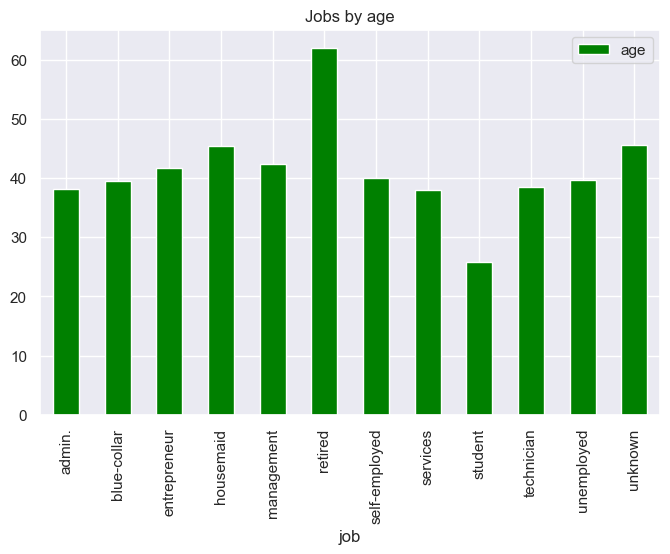

In [60]:
pd.pivot_table(df, index='job', values='age').plot(kind='bar', figsize=(8, 5), color = 'green', title='Jobs by age' )

Text(0.5, 1.0, 'Dependence of cases on depositing')

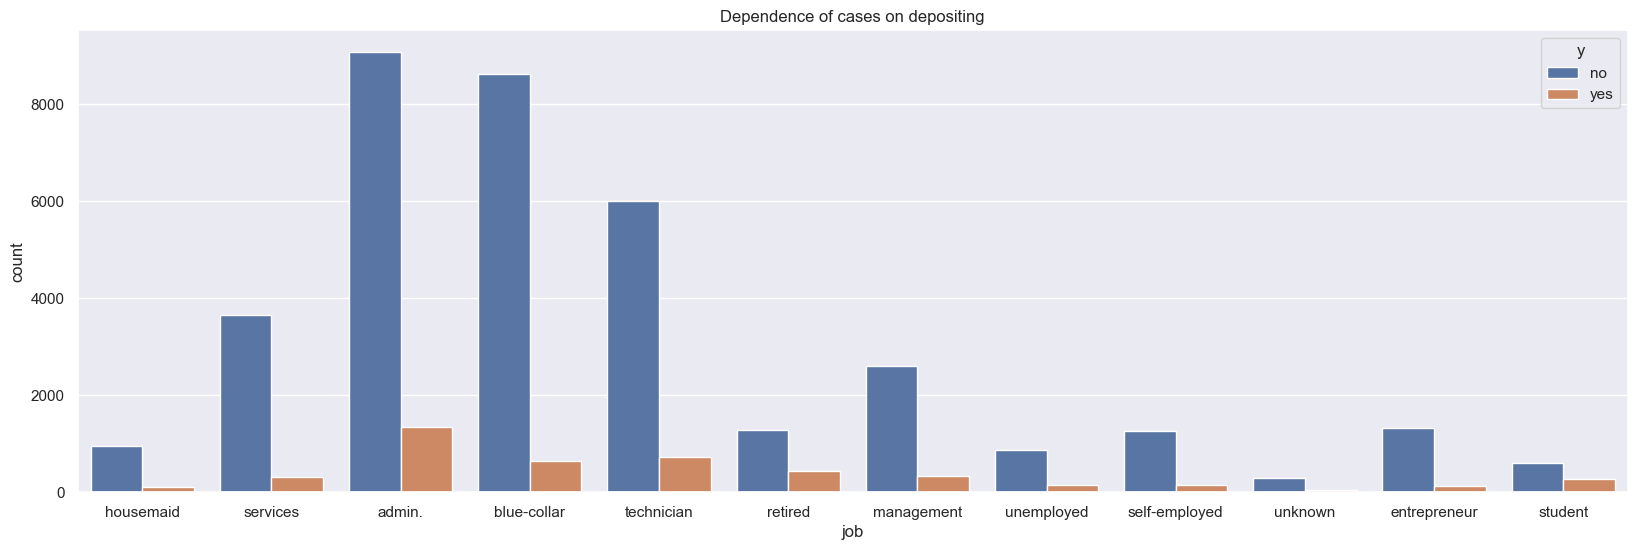

In [61]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['job'], data=df, hue=df['y'])
plt.title('Dependence of cases on depositing')


<Axes: xlabel='contact', ylabel='count'>

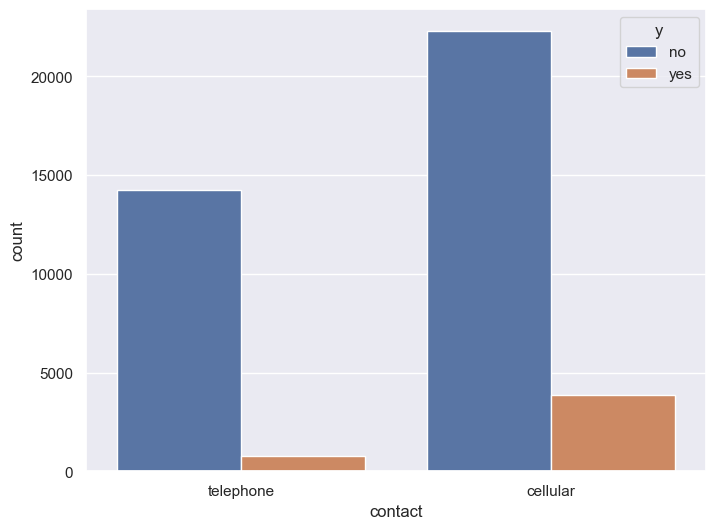

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(x='contact', data=df, hue='y')
# connections with cellular are more successful.

<Axes: xlabel='marital', ylabel='count'>

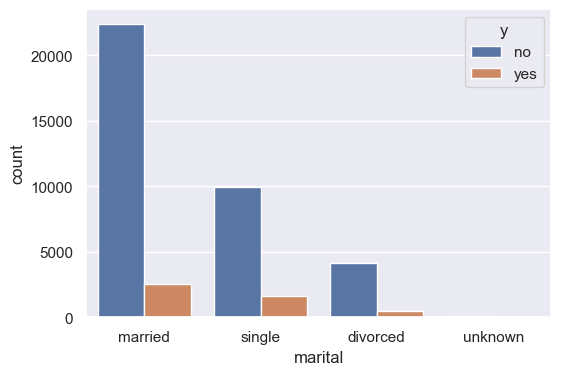

In [63]:
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', data=df, hue='y')
# Married and single people deposit more.

### **Outlier Treatment and Null Values ​​Checking.**

In [64]:
# Using the IQR method
q1= df['age'].quantile(0.25)
q3= df['age'].quantile(0.75)
iqr = q3-q1

In [65]:
q1, q3, iqr

(32.0, 47.0, 15.0)

In [66]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(69.5, 9.5)

In [67]:
new_df = df.loc[(df['age'] < upper_limit) & (df['age'] > lower_limit)]
df.shape[0] - new_df.shape[0] # number of outliers

469

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


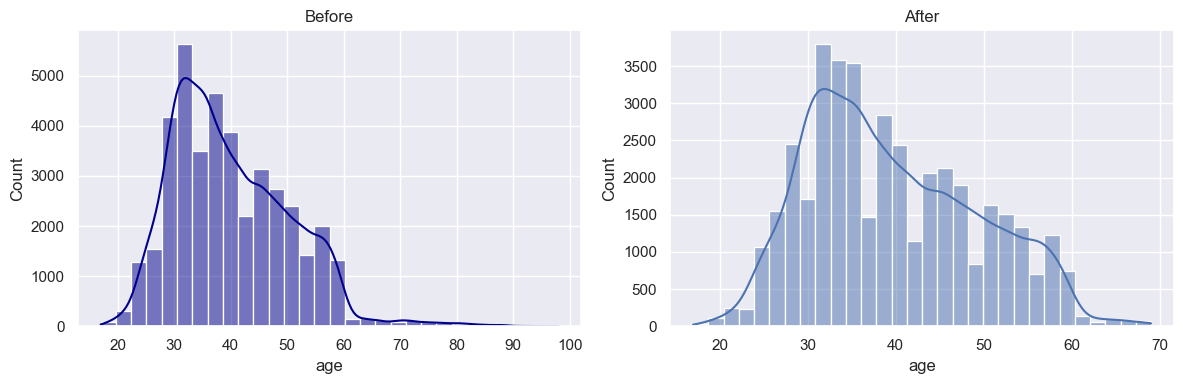

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['age'], kde=True, bins=30, ax=axes[0], color='darkblue').set_title('Before')
sns.histplot(new_df['age'], kde=True, bins=30, ax=axes[1]).set_title('After')

plt.tight_layout()


In [69]:
# We can clean the outliers in the desired line by writing a function.
def clip_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    # Clipping the DataFrame to keep only the rows within the IQR limits for the specified column
    new_df = df.loc[(df[column] <= upper_limit) & (df[column] >= lower_limit)]

    return new_df
clipped_df = clip_outliers(df, 'age')

#### We can use the clip() function to compress outliers without removing them.

In [70]:
clipped_age = np.clip(df['age'], lower_limit, upper_limit) #bringing outliers to the minimum and maximum values.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

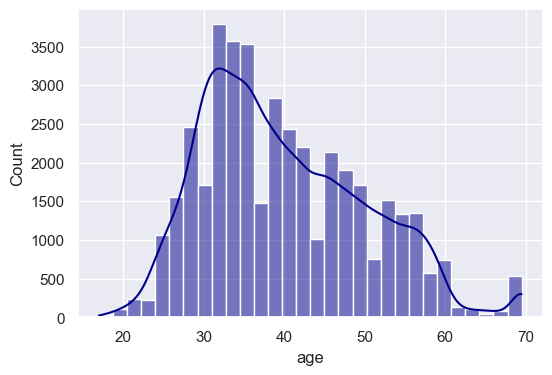

In [71]:
plt.figure(figsize=(6, 4))
sns.histplot(clipped_age, kde=True, bins=30, color='darkblue')

#### Check the nulls.

In [72]:
df.isnull().sum() #There are no null values. But if there were, we could fill in the mean, median, or mode.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### **Transforming variables with OptBinning**

In [78]:
from optbinning import OptimalBinning
from sklearn.model_selection import train_test_split

data = df.copy()
X = data.drop(columns=['y'])  # 'y' is the target.
y = data['y'].map({'yes': 1, 'no': 0})  # (0, 1).

In [80]:
optb_age = OptimalBinning(name='age', dtype='numerical', solver='cp')
optb_age.fit(X['age'], y)

X['age_binned'] = optb_age.transform(X['age'], metric='woe')
X[['age', 'age_binned']].head()


,age,age_binned
0,56,0.157006
1,57,0.157006
2,37,0.206549
3,40,0.368268
4,56,0.157006


In [81]:
# Variables to be binned
continuous_vars = ['age', 'campaign']

binned_data = pd.DataFrame(index=X.index)

for var in continuous_vars:
    optb = OptimalBinning(name=var, dtype='numerical', solver='cp')
    optb.fit(X[var], y)
    binned_data[var + '_binned'] = optb.transform(X[var], metric='woe')

binned_data.head()


,age_binned,campaign_binned
0,0.157006,-0.166227
1,0.157006,-0.166227
2,0.206549,-0.166227
3,0.368268,-0.166227
4,0.157006,-0.166227


Using the binning method, for example, we divide age into groups and transform them into new values.

With normalization, we bring the variable to the range of 0 and 1. To reduce the scales. --> **MinMaxScale()**

Standardization brings the mean value to 0 and the deviation to 1. --> **StandardScaler()**

### **Build Models for Binary Classification and choose the most optimal one.**

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, mean_squared_error, roc_curve
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

In [83]:
df = pd.read_csv('bank-direct-marketing-campaigns.csv')

Fixing some column names, replacing dots with underscores.

In [84]:
df = df.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx', 'nr.employed': 'nr_employed', 'y(dependent _variable)': 'y'})

In [85]:
q1= df['age'].quantile(0.25)
q3= df['age'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
new_df = df.loc[(df['age'] < upper_limit) & (df['age'] > lower_limit)]


In [86]:
categoric_columns = ['job', 'marital',
       'education', 'default', 'housing',
        'loan', 'contact', 'month',
        'day_of_week', 'poutcome']

df_encoded = pd.get_dummies(new_df, columns=categoric_columns, drop_first=True)

We scale our Numeric columns with MinMaxScaler().

In [87]:
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

In [88]:
df_encoded.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.750000,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,no,...,True,False,False,False,True,False,False,False,True,False
1,0.769231,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,no,...,True,False,False,False,True,False,False,False,True,False
2,0.384615,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,no,...,True,False,False,False,True,False,False,False,True,False
3,0.442308,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,no,...,True,False,False,False,True,False,False,False,True,False
4,0.750000,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,no,...,True,False,False,False,True,False,False,False,True,False


In [89]:
df_encoded.describe()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,40719.000000,40719.000000,40719.000000,40719.000000,40719.000000,40719.000000,40719.000000,40719.000000,40719.000000
mean,0.434596,0.028633,0.965411,0.023871,0.731264,0.537789,0.428901,0.684335,0.775080
std,0.186057,0.050536,0.182164,0.069080,0.324034,0.223775,0.191158,0.389775,0.268463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,1.000000,0.000000,0.333333,0.340608,0.338912,0.163228,0.512287
50%,0.403846,0.018182,1.000000,0.000000,0.937500,0.622369,0.376569,0.957379,0.859735
75%,0.576923,0.036364,1.000000,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

#### Since there is a serious imbalance problem in our data, we balance yes and no values ​​by oversampling.

In [91]:
smote = SMOTE(sampling_strategy='auto')

X_resampled, y_resampled = smote.fit_resample(X, y)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

          no       0.84      0.92      0.88      7257
         yes       0.91      0.82      0.87      7263

    accuracy                           0.87     14520
   macro avg       0.88      0.87      0.87     14520
weighted avg       0.88      0.87      0.87     14520



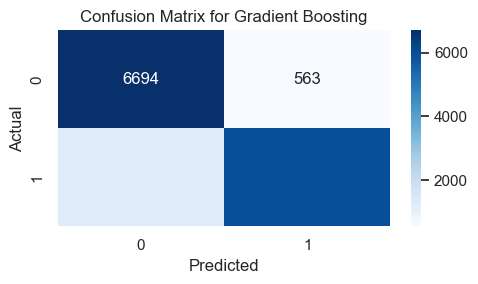

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          no       0.74      0.82      0.78      7257
         yes       0.80      0.71      0.75      7263

    accuracy                           0.77     14520
   macro avg       0.77      0.77      0.76     14520
weighted avg       0.77      0.77      0.76     14520



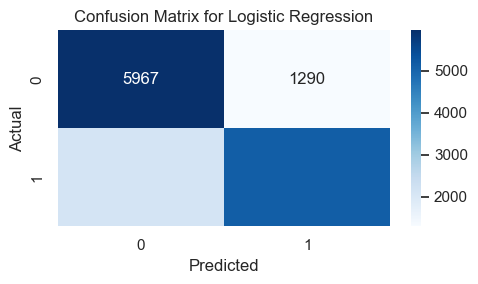


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

          no       0.69      0.78      0.73      7257
         yes       0.75      0.64      0.69      7263

    accuracy                           0.71     14520
   macro avg       0.72      0.71      0.71     14520
weighted avg       0.72      0.71      0.71     14520



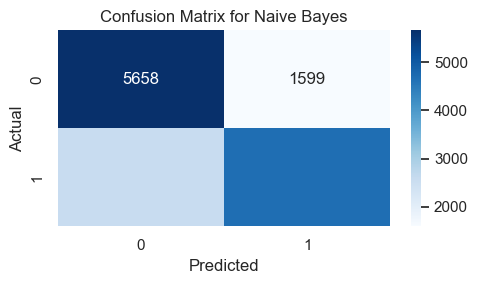


Classification Report for Support Vector Machines:
              precision    recall  f1-score   support

          no       0.73      0.83      0.78      7257
         yes       0.80      0.70      0.75      7263

    accuracy                           0.77     14520
   macro avg       0.77      0.77      0.76     14520
weighted avg       0.77      0.77      0.76     14520



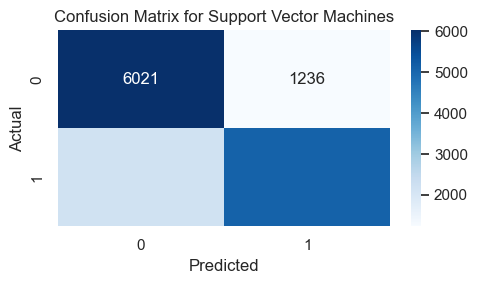


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

          no       0.91      0.80      0.85      7257
         yes       0.82      0.92      0.87      7263

    accuracy                           0.86     14520
   macro avg       0.87      0.86      0.86     14520
weighted avg       0.87      0.86      0.86     14520



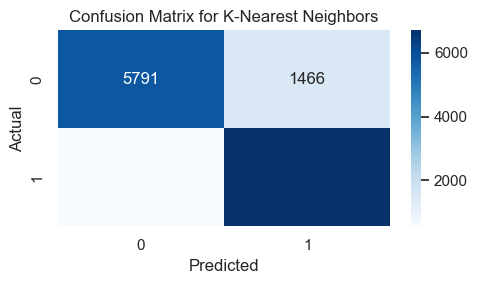


Classification Report for Random Forest:
              precision    recall  f1-score   support

          no       0.94      0.94      0.94      7257
         yes       0.94      0.94      0.94      7263

    accuracy                           0.94     14520
   macro avg       0.94      0.94      0.94     14520
weighted avg       0.94      0.94      0.94     14520



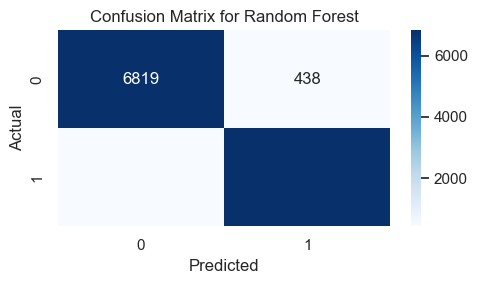

/opt/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(



Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

          no       0.94      0.94      0.94      7257
         yes       0.94      0.94      0.94      7263

    accuracy                           0.94     14520
   macro avg       0.94      0.94      0.94     14520
weighted avg       0.94      0.94      0.94     14520



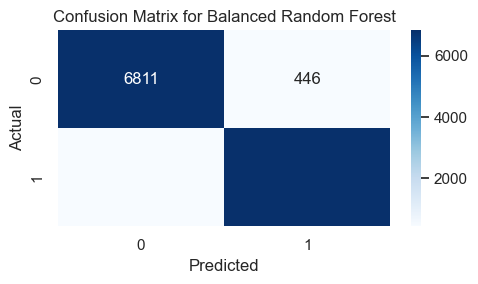


Classification Report for Decision Tree:
              precision    recall  f1-score   support

          no       0.91      0.89      0.90      7257
         yes       0.89      0.91      0.90      7263

    accuracy                           0.90     14520
   macro avg       0.90      0.90      0.90     14520
weighted avg       0.90      0.90      0.90     14520



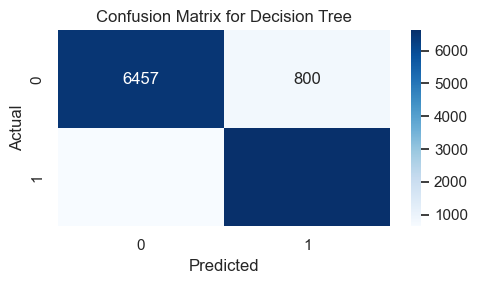

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# We will add the models to the dictionary.
models = {}

models['Gradient Boosting'] = GradientBoostingClassifier()
models['Logistic Regression'] = LogisticRegression()
models['Naive Bayes'] = GaussianNB()
models['Support Vector Machines'] = LinearSVC()
models['K-Nearest Neighbors'] = KNeighborsClassifier()
models['Random Forest'] = RandomForestClassifier()
models['Balanced Random Forest'] = BalancedRandomForestClassifier()
models['Decision Tree'] = DecisionTreeClassifier()

accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    # Train the models
    models[key].fit(X_train, y_train)


    predictions = models[key].predict(X_test)

    # Evaluate the models
    accuracy[key] = accuracy_score(y_test, predictions)
    precision[key] = precision_score(y_test, predictions, pos_label='yes')
    recall[key] = recall_score(y_test, predictions, pos_label='yes')
    f1[key] = f1_score(y_test, predictions, pos_label='yes')

    print(f'\nClassification Report for {key}:')
    print(classification_report(y_test, predictions))

    plt.figure(figsize=(5, 3))  # Adjust width and height as needed

    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {key}')
    plt.tight_layout()
    plt.show()  


#### The best performing model is Random Forest

In [95]:
df_model = pd.DataFrame(index=models.keys(), columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1 Score'] = f1.values()

df_model

,Accuracy,Precision,Recall,F1 Score
Gradient Boosting,0.871970,0.913783,0.821561,0.865221
Logistic Regression,0.765014,0.799409,0.707834,0.750840
Naive Bayes,0.712052,0.745382,0.644500,0.691280
Support Vector Machines,0.765083,0.804554,0.700537,0.748951
K-Nearest Neighbors,0.860606,0.820585,0.923172,0.868861
Random Forest,0.939532,0.939678,0.939419,0.939548
Balanced Random Forest,0.939463,0.938703,0.940383,0.939542
Decision Tree,0.900482,0.892154,0.911194,0.901573
